# CNN

In [1]:
import tensorflow as tf
import keras
tf.__version__

Using TensorFlow backend.


AttributeError: module 'keras.backend.tensorflow_backend' has no attribute '_is_tf_1'

In [ ]:
K.set_image_data_format('channels_first')

In [2]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2937170065740228689
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1406107238
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13400987982131793733
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from keras import backend as K
batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28,28
(x_train, y_train), (x_test, y_test)=mnist.load_data()

AttributeError: module 'keras.backend.tensorflow_backend' has no attribute '_is_tf_1'

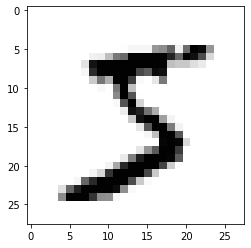

In [25]:
first_image = x_train[0, :, :]
plt.imshow(first_image, cmap=plt.cm.Greys);

In [26]:
# X_train = X_train.reshape(X_train.shape[0], 1, 28, 28) # channel_first
# X_test = X_test.reshape(X_test.shape[0], 1, 28, 28) # channel_first
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) # channel_last
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) # channel_last

x_train = x_train.astype('float32') # 타입을 바꾸는 이유: 255로 나누기 위해
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [27]:
model = Sequential()
model.add(Conv2D(32, 3, 3, activation = 'relu', input_shape=(28,28,1))) # 아웃풋 필터 개수 32, 필터 사이즈 3x3, 입력데이터 28x28
# 28x28 => (128, 26, 26, 32)
model.add(Conv2D(64, 3, 3, activation = 'relu'))
# 128,24,24,64
model.add(MaxPooling2D(pool_size=(2,2))) # 128, 12, 12, 64
model.add(Dropout(0.25))
model.add(Flatten()) # 12x12x64 => 1차원화하면 9216
model.add(Dense(128, activation = 'relu')) # FFNN, FC(Fully-connected), 9216x128
# 128x128
model.add(Dropout(0.5)) # 계산회로만 생략
model.add(Dense(10, activation = 'softmax')) # 가중치 128x10
# 128x10

C:\Users\ICT01_04\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
C:\Users\ICT01_04\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 46s 759us/step - loss: 0.2607 - acc: 0.9199 - val_loss: 0.0564 - val_acc: 0.9823
Epoch 2/12
60000/60000 [==============================] - 46s 764us/step - loss: 0.0839 - acc: 0.9754 - val_loss: 0.0415 - val_acc: 0.9863
Epoch 3/12
60000/60000 [==============================] - 45s 754us/step - loss: 0.0657 - acc: 0.9809 - val_loss: 0.0344 - val_acc: 0.9880
Epoch 4/12
60000/60000 [==============================] - 45s 756us/step - loss: 0.0527 - acc: 0.9841 - val_loss: 0.0350 - val_acc: 0.9885
Epoch 5/12
60000/60000 [==============================] - 45s 758us/step - loss: 0.0456 - acc: 0.9859 - val_loss: 0.0328 - val_acc: 0.9894
Epoch 6/12
60000/60000 [==============================] - 46s 773us/step - loss: 0.0399 - acc: 0.9886 - val_loss: 0.0294 - val_acc: 0.9903
Epoch 7/12
60000/60000 [==============================] - 47s 777us/step - loss: 0.0364 - acc: 0.9888 - val_loss: 0.

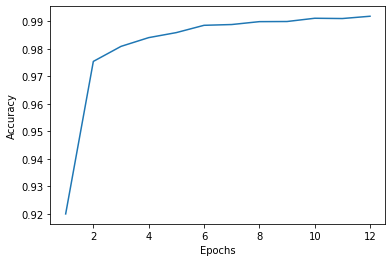

In [28]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics=['acc'])
# train, validation, test
# epoch 마다 accuracy를 저장
class AccuracyHistory(keras.callbacks.Callback): # 오버라이딩 (재정의)
    def on_train_begin(self, logs={}): # 훈련 시작시 이벤트
        self.acc = []
    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
        
history = AccuracyHistory()
history.on_train_begin()

model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, verbose = 1, validation_data =(x_test, y_test), callbacks=[history])
score = model.evaluate(x_test, y_test, verbose =0)
print(score[0])
print(score[1])

plt.plot(range(1,13), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

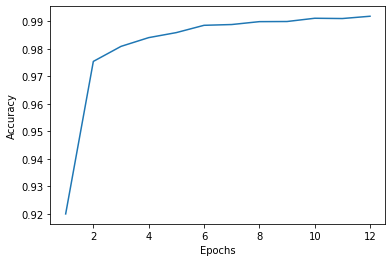

In [29]:
plt.plot(range(1,13), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# 모델 저장 / 로딩

In [30]:
# HDFS(hadoop file system) : model 구조 전체 저장
# 가중치 구조, optimization stage 등이 저장
# json으로 저장, 구조, 가중치를 별도로 저장 => web에서 tensorflow
# tensorflow.js import
model.save("model_mnist.h5")
print("모델이 저장되었습니다.")
from keras.models import load_model

model = load_model('model_mnist.h5')
print('모델이 로딩되었습니다')

model.summary()

모델이 저장되었습니다.
모델이 로딩되었습니다
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_7 (Dropout)          

In [31]:
# 레이어 정보 확인
l1 = model.layers[0]
l2 = model.layers[1]
print(l1.name)
print(l1.input_shape)
print(l1.activation)
print(l1.output_shape)

conv2d_7
(None, 28, 28, 1)
<function relu at 0x000001CB35D40B88>
(None, 26, 26, 32)


# imageDataGenerator

C:\Users\ICT01_04\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


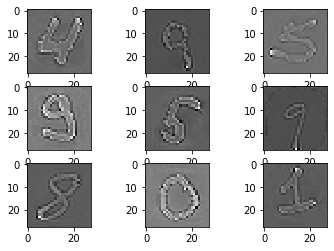

In [32]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
(X_train,y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# datagen = ImageDataGenerator(horizontal_flip = True, vertical_flip = True)
# datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
# datagen = ImageDataGenerator(rotation_range=90) # 로테이션 옵션
datagen = ImageDataGenerator(zca_whitening=True) # 이미지 백색화 -> 노이즈 제거(변수간 상관도를 없앰-PCA)
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
    for i in range(0,9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28,28), cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break

In [33]:
# gpu 사용 가능 확인
import tensorflow as tf 
print(tf.__version__) 
tf.test.is_gpu_available()


1.15.0


False

In [34]:
import tensorflow as tf
tf.test.gpu_device_name()

''

X_train shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples


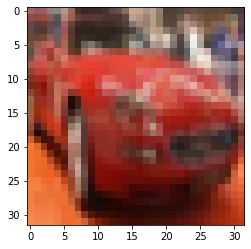

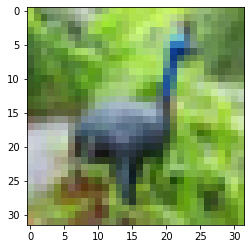

In [12]:
from keras.datasets import cifar10
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print('X_train shape: ', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0] , 'test samples')
NB_CLASSES = 10
Y_train = np_utils.to_categorical(Y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(Y_test, NB_CLASSES)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

plt.imshow(X_train[5])
plt.grid(False)
plt.show()
plt.imshow(X_train[6])
plt.grid(False)
plt.show()

In [13]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [14]:
from keras.layers import Activation
model = Sequential()
model.add(Conv2D(32, kernel_size =3, padding = 'same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size =3, padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [15]:
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

C:\Users\ICT01_04\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_corssentropy', optimizer = OPTIM, metrics=['accuracy'])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)       

ValueError: Unknown loss function:categorical_corssentropy

In [17]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, validaiton_split=VALIDATION_SPLIT, verbose=VERBOSE)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ICT01_04\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-5302d4a0ed9a>", line 1, in <module>
    history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, validaiton_split=VALIDATION_SPLIT, verbose=VERBOSE)
  File "C:\Users\ICT01_04\Anaconda3\lib\site-packages\keras\engine\training.py", line 1118, in fit
    raise TypeError('Unrecognized keyword arguments: ' + str(kwargs))
TypeError: Unrecognized keyword arguments: {'validaiton_split': 0.2}

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ICT01_04\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exc

TypeError: Unrecognized keyword arguments: {'validaiton_split': 0.2}

In [18]:
datagen = ImageDataGenerator(featurewise_center=False, samplewise_center=False, 
                             featruewise_std_normalization=False, samplewise_std_normalization = False, zca_whitening=False, 
                             rotatation_range=0, width_shift_range=0.1, height_shift_range=0.1, 
                             horizontal_flip = True, vertical_flip=False)
dataget.fit(X_train)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ICT01_04\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-76edf1112623>", line 4, in <module>
    horizontal_flip = True, vertical_flip=False)
TypeError: __init__() got an unexpected keyword argument 'featruewise_std_normalization'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ICT01_04\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ICT01_04\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of

TypeError: __init__() got an unexpected keyword argument 'featruewise_std_normalization'

In [19]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size = BATCH_SIZE), samples_per_epoch=X_train.shape[0],
                    nb_epoch = NB_EPOCH,
                    verbose = VERBOSE)

C:\Users\ICT01_04\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ICT01_04\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., verbose=1, steps_per_epoch=390, epochs=40)`
  This is separate from the ipykernel package so we can avoid doing imports until
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ICT01_04\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-b8a240faf18e>", line 3, in <module>
    verbose = VERBOSE)
  File "C:\Users\ICT01_04\Anaconda3\lib\site-packages\keras\legacy\interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\ICT01_04\Anaconda3\lib\site-packages\keras\engine\training.py", line 1732, in fit_generator
    initial_epoch=initial_epoch)
  File "C:\Users\ICT01_04\Anaconda3\lib\site-packages\keras\engine\training_generator.py", line 42, in fit_generator
    model._make_train_function()
  File "C:\Users\ICT01_04\Anaconda3\lib\site-packages\keras\engine\training.py", line 303, in _make_train_function
    raise RuntimeError('You must compile your model before using it.')
RuntimeError: You must compile your model before using it.

During handling of the above exception, 

RuntimeError: You must compile your model before using it.

In [20]:
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest Score: ", score[0])
print("\nTest Accuracy: ", score[1])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ICT01_04\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-8c969bb93cec>", line 1, in <module>
    score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
  File "C:\Users\ICT01_04\Anaconda3\lib\site-packages\keras\engine\training.py", line 1349, in evaluate
    batch_size=batch_size)
  File "C:\Users\ICT01_04\Anaconda3\lib\site-packages\keras\engine\training.py", line 589, in _standardize_user_data
    feed_output_names = self._feed_output_names
AttributeError: 'Sequential' object has no attribute '_feed_output_names'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ICT01_04\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'Attribut

AttributeError: 'Sequential' object has no attribute '_feed_output_names'

In [21]:
# json
model_json =model.to_json()
open('cifar10_architecture.json','w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

In [22]:
from keras.models import model_from_json
json_file = open('cifar10_architecture.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('cifar10_weights.h5')
print("Loaded model from disk")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ICT01_04\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-05cdc196dd89>", line 2, in <module>
    json_file = open('cifar10_architecture.jso.json', 'r')
FileNotFoundError: [Errno 2] No such file or directory: 'cifar10_architecture.jso.json'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ICT01_04\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'FileNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ICT01_04\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, n

FileNotFoundError: [Errno 2] No such file or directory: 'cifar10_architecture.jso.json'

In [ ]:
# 문제 1: accuracy graph를 출력
# 문제 2: 이미지 cat, dog을 다운로드 한 다음 위의 모델로 예측해보시오